In [1]:
# IMPORTS
from matplotlib import pyplot as plt
import numpy as np

from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

from sklearn.linear_model import LogisticRegression

np.random.seed(42)

In [ ]:
# Load the MNIST dataset

mnist = fetch_openml("mnist_784")
X, y = mnist["data"].to_numpy().reshape(-1, 28, 28).astype(float), mnist[
    "target"
].to_numpy().astype(int)
X[X <= 127] = 0.0
X[X > 127] = 1.0
n = X.shape[1] * X.shape[2]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)
print(X_train.data.shape)
H, W = X_train.shape[1], X_train.shape[2]  # height and width of the image

(70000, 28, 28)
(63000, 28, 28)


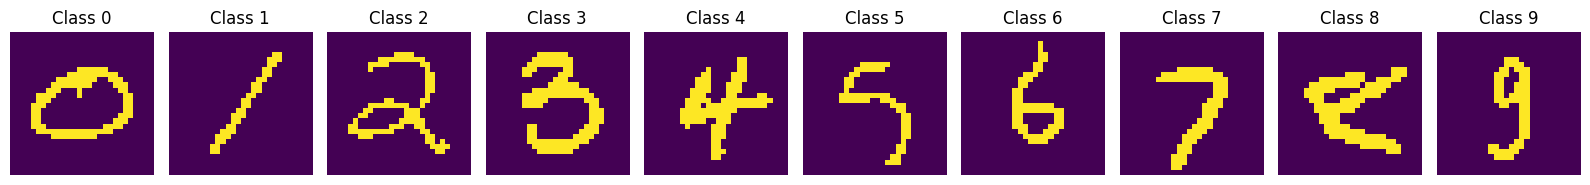

In [3]:
# Plot random image from each class

def plot_digits(X_train, y_train, num_classes=10):
    fig, axes = plt.subplots(1,num_classes, figsize=(16, 6))

    for cls in range(num_classes):
        # Select a random image from the class
        class_indices = np.where(y_train == cls)[0]
        random_index = np.random.choice(class_indices)
        random_image = X_train[random_index]

        # Plot the random image
        axes[cls].imshow(random_image)
        axes[cls].set_title(f"Class {cls}")
        axes[cls].axis("off")

    plt.tight_layout()

plot_digits(X_train, y_train)

In [33]:
# Helper function for Laplace smoothing
def laplace_smoothing(count, total, alpha=1, coef=2):
    return (count + alpha) / (total + coef * alpha)


class NaiveBayesClassifier:
    def __init__(self, num_classes=10):
        self.num_classes = num_classes
        self.P_y = None
        self.P_xy = None

    def train(self, X, y):
        print("Training NaiveBayes...")
        n_samples, H, W = X.shape[0], X.shape[1], X.shape[2]
        self.P_y = np.random.randn(self.num_classes)
        self.P_xy = np.random.randn(self.num_classes, H, W)

        # estimate P(y) by the prior belief, which is the frequency of each class
        for i in range(self.num_classes):
            self.P_y[i] = np.sum(y == i) / n_samples

        # estimate P(x|y) for each pixel x_i using Laplace smoothing
        for i in range(self.num_classes):
            for j in range(H):
                for k in range(W):
                    # count the number of times pixel x_i is 1 in class y
                    count = np.sum(X[y == i, j, k] == 1)

                    # total number of samples in class y
                    total = np.sum(y == i)

                    # estimate P(x_i|y) using Laplace smoothing
                    self.P_xy[i, j, k] = laplace_smoothing(count, total)



    def predict(self, X):
        print("Testing NaiveBayes...")
        predictions = np.random.randint(0,high=self.num_classes, size=X.shape[0])

        for i in range(X.shape[0]):
            log_posteriors = np.log(self.P_y)  # Start with log(P(y)) for each class

            # Sum over all pixels (784 features for 28x28 images)
            for j in range(X.shape[1]):
                for k in range(X.shape[2]):
                    x_ik = X[i, j, k]  # Pixel value for sample i at position (j, k)
                    
                    # Add log(P(x_i=1|y)) if x_ik is 1, otherwise log(P(x_i=0|y))
                    if x_ik == 1:
                        log_posteriors += np.log(self.P_xy[:, j, k])  # P(x_i=1|y)
                    else:
                        log_posteriors += np.log(1 - self.P_xy[:, j, k])  # P(x_i=0|y)

            # Find the class with the maximum log-posterior
            predictions[i] = np.argmax(log_posteriors)

        return predictions

In [34]:
# Logistic Regression Classifier
class LogisticRegressionClassifier:
    def __init__(self, num_classes=10):
        self.num_classes = num_classes
        self.lr_model = LogisticRegression(max_iter = 1000, multi_class = 'multinomial', solver = 'lbfgs')


    def train(self, X, y):
        print("Training logistic regression...")

        # Flatten the input images
        X_flat = X.reshape(X.shape[0], -1)

        # Train the logistic regression model
        self.lr_model.fit(X_flat, y)


    def predict(self, X):
        print("Predicting with logistic regression...")
        predictions = np.random.randint(0,high=self.num_classes, size=X.shape[0])

        X_flat = X.reshape(X.shape[0], -1)

        # Predict the class labels
        predictions = self.lr_model.predict(X_flat)

        return predictions
    
    def get_weights(self):
        if self.lr_model is None:
            return None
        return self.lr_model.coef_

In [35]:
# Train and Evaluate Naive Bayes Classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.train(X_train, y_train)
nb_preds = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

# Train and Evaluate Logistic Regression Classifier
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train.reshape(-1, n))
X_test_lr = scaler.transform(X_test.reshape(-1, n))
lr_classifier = LogisticRegressionClassifier()
lr_classifier.train(X_train_lr, y_train)
lr_preds = lr_classifier.predict(X_test_lr)
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")


Training NaiveBayes...
Testing NaiveBayes...
Naive Bayes Accuracy: 83.59%
Training logistic regression...


c:\Users\filip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Predicting with logistic regression...
Logistic Regression Accuracy: 90.37%


Testing NaiveBayes...
Testing NaiveBayes...
Testing NaiveBayes...
Testing NaiveBayes...
Testing NaiveBayes...
Testing NaiveBayes...
Testing NaiveBayes...
Testing NaiveBayes...
Testing NaiveBayes...
Testing NaiveBayes...


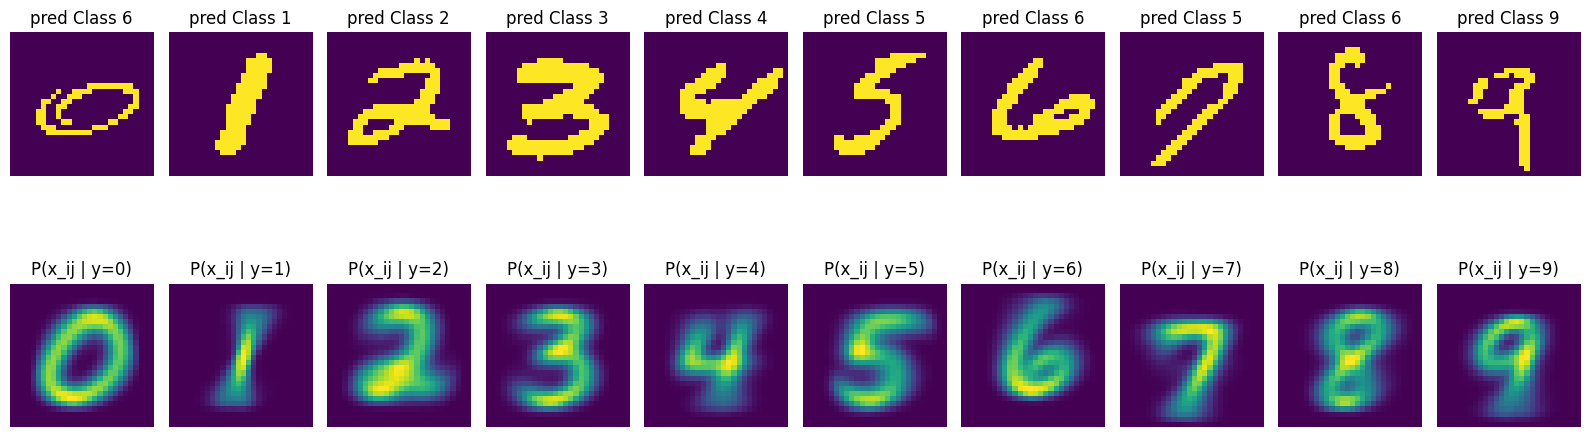

In [36]:
# Function to plot a random image and its corresponding P_xy for each class
def plot_random_image_and_p_xy(nb_classifier, X_test, y_test, num_classes=10):
    fig, axes = plt.subplots(2, num_classes, figsize=(16, 6))

    for cls in range(num_classes):
        # Select a random image from the class
        class_indices = np.where(y_test == cls)[0]
        random_index = np.random.choice(class_indices)
        random_image = X_test[random_index]
        prediction = nb_classifier.predict(random_image.reshape(1, H, W))[0]

        # Plot the random image
        axes[0, cls].imshow(random_image)
        axes[0, cls].set_title(f"pred Class {int(prediction)}")
        axes[0, cls].axis("off")

        # Plot the P_xy for the class
        axes[1, cls].imshow(nb_classifier.P_xy[cls])
        axes[1, cls].set_title(f"P(x_ij | y={cls})")
        axes[1, cls].axis("off")

    plt.tight_layout()

plot_random_image_and_p_xy(nb_classifier, X_train, y_train)

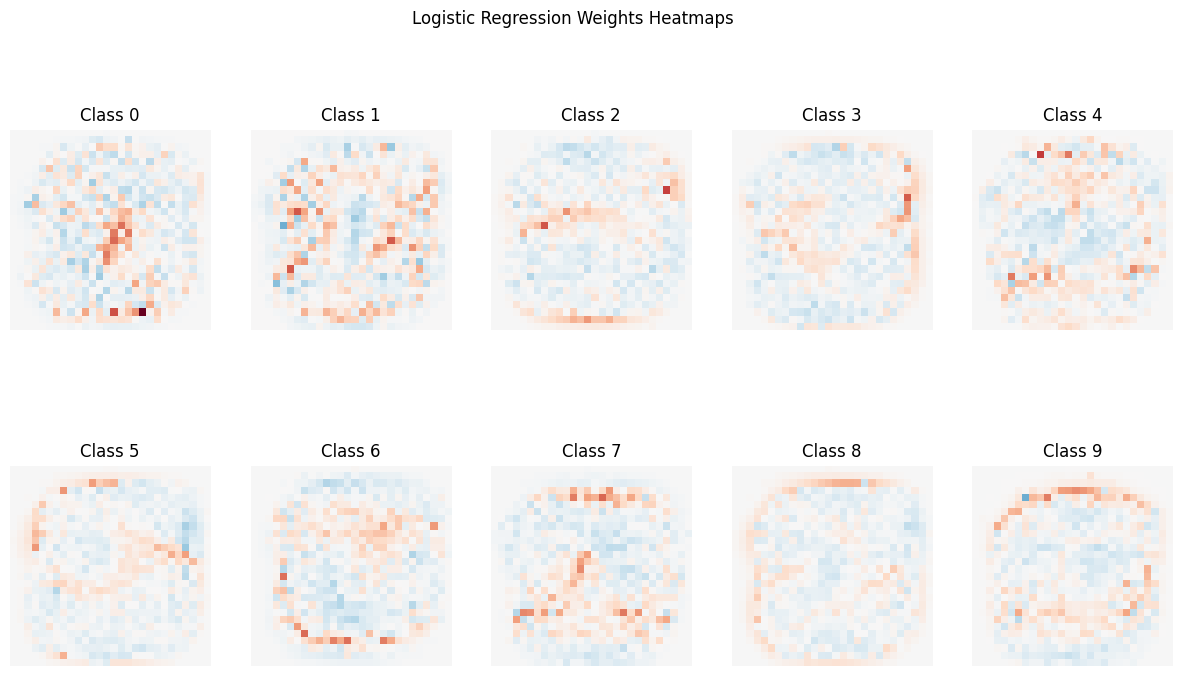

In [37]:
# Visualize weights for each class
coef = lr_classifier.get_weights()
if coef is None:
    print("No weights found")
    coef = np.random.randn(10, 28, 28)
weights = coef.reshape(10, 28, 28)
scale = np.abs(coef).max()

plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(
        weights[i],
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    plt.title(f"Class {i}")
    plt.axis("off")
plt.suptitle("Logistic Regression Weights Heatmaps")
plt.show()